# Ejercicio 1: Implementación del Modelo de Cascada Independiente

En este ejercicio, implementarás las componentes clave para simular un modelo de cascada independiente utilizando la clase `Simulation` que se te proporciona. El objetivo es modelar cómo se propaga una "infección" (o un rumor, una idea, etc.) a través de una red.

Deberás definir tres funciones en Python:

1.  **`estado_inicial_cascada(G: nx.Graph) -> dict`**:
    *   Esta función toma un grafo `G` como entrada.
    *   Debe devolver un diccionario donde las claves son los nodos del grafo y los valores representan el estado de cada nodo.
    *   Inicialmente, todos los nodos deben estar en estado `"sano"`.
    *   Luego, se elige **un único nodo al azar** del grafo y su estado se cambia a `"infectado"`.

2.  **`transicion_estado_cascada(G: nx.Graph, estado_actual: dict) -> dict`**:
    *   Esta función toma el grafo `G` y el diccionario `estado_actual` de los nodos.
    *   Define cómo cambian los estados en cada paso de la simulación:
        *   Los nodos que ya están en estado `"infectado"` permanecen `"infectado"`.
        *   Para cada nodo `v` que actualmente está `"sano"`:
            *   Considera a cada uno de sus vecinos `u` que está `"infectado"` en el `estado_actual`.
            *   El vecino `u` (infectado) tiene una probabilidad \( p_{uv} = \frac{1.0}{\text{grado}(u)} \) de infectar al nodo `v` (sano) en este paso. El grado de `u`, denotado como \(\text{grado}(u)\), es el número de vecinos que tiene `u`.
            *   Si al menos uno de los vecinos infectados de `v` logra transmitir la infección (según su respectiva probabilidad), el estado de `v` cambiará a `"infectado"`.
    *   La función debe devolver un diccionario que contenga **únicamente** los nodos cuyo estado ha cambiado en este paso y su nuevo estado. Por ejemplo, si el nodo `X` cambió de `"sano"` a `"infectado"`, el diccionario devuelto sería `{'X': "infectado"}`. Si ningún nodo cambia de estado, devuelve un diccionario vacío.

3.  **`condicion_parada_cascada(G: nx.Graph, estado_actual: dict) -> bool`**:
    *   Esta función toma el grafo `G` y el `estado_actual` de los nodos.
    *   Debe devolver `True` si la simulación debe detenerse, y `False` en caso contrario.
    *   La simulación se detendrá si todos los nodos en el grafo han alcanzado el mismo estado (es decir, todos están `"sano"` o todos están `"infectado"`).

Observación: La probabilidad de activación \( p_{uv} = \frac{1.0}{\text{grado}(u)} \) significa que los nodos infectados con menos vecinos (menor grado) son más influyentes o efectivos al intentar infectar a un vecino específico, ya que su "esfuerzo" de propagación se divide entre menos contactos.

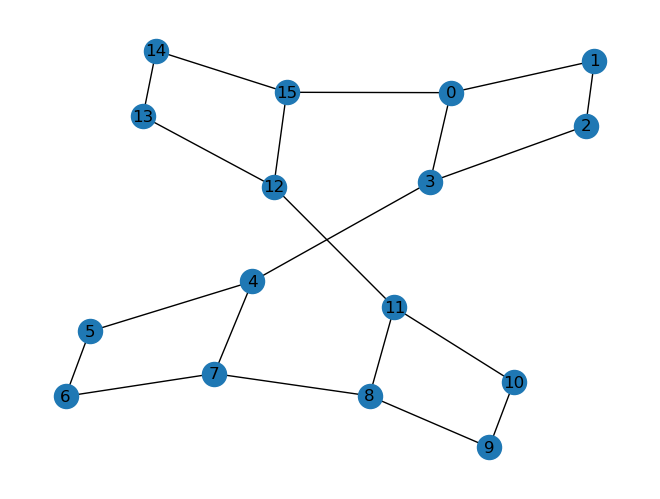

Stop condition met at step 12.


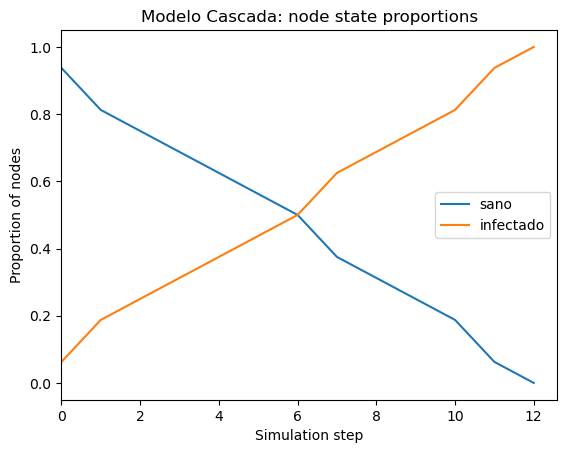

In [4]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
from simulation import Simulation 

def estado_inicial_cascada_solucion(G: nx.Graph) -> dict:
    estado = {n: "sano" for n in G.nodes()}
    infectado_inicial = random.choice(list(G.nodes()))
    estado[infectado_inicial] = "infectado"
    return estado


def transicion_estado_cascada_solucion(G: nx.Graph, estado_actual: dict) -> dict:
    nuevos_estados = {}
    for nodo in G.nodes():
        if estado_actual[nodo] == "sano":
            for vecino in G.neighbors(nodo):
                if estado_actual[vecino] == "infectado":
                    probabilidad = 1.0 / G.degree[vecino]
                    if random.random() < probabilidad:
                        nuevos_estados[nodo] = "infectado"
                        break
    return nuevos_estados


def condicion_parada_cascada_solucion(G: nx.Graph, estado_actual: dict) -> bool:
    return len(set(estado_actual.values())) == 1

    
g_simple_infection = nx.Graph()
g_simple_infection.add_edge('A', 'B') # A: degree 1, B: degree 1
current_state_simple = {'A': "infectado", 'B': "sano"}
random.seed(10) # random.random() será < 1.0 (probabilidad de A->B es 1/1=1)
changes = transicion_estado_cascada_solucion(g_simple_infection, current_state_simple)
assert changes.get('B') == "infectado", "El nodo B debería infectarse."
assert len(changes) == 1, "Solo el nodo B debería cambiar de estado."

G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
nx.add_cycle(G, [8, 9, 10, 11])
nx.add_cycle(G, [12, 13, 14, 15])
G.add_edge(3, 4)
G.add_edge(8, 7)
G.add_edge(11, 12)
G.add_edge(15, 0)

nx.draw(G, with_labels=True)
plt.show()
sim = Simulation(G, estado_inicial_cascada_solucion, transicion_estado_cascada_solucion, condicion_parada_cascada_solucion, name='Modelo Cascada')
sim.run(40)
sim.steps
sim.plot()
plt.show()